<a href="https://colab.research.google.com/github/Pawanme9034/linear_regresion_model_train/blob/main/Ridge_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

In [25]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [26]:
# Print the feature names
print("Feature names:", data.feature_names)

# Print the first few rows of the feature matrix
print("First few rows of the feature matrix:")
for i in range(5):
    print(data.data[i])

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
First few rows of the feature matrix:
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
[-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06833155 -0.09220405]
[ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
 -0.03235593 -0.00259226  0.00286131 -0.02593034]
[-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
 -0.03603757  0.03430886  0.02268774 -0.00936191]
[ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
  0.00814208 -0.00259226 -0.03198764 -0.04664087]


In [27]:

# Create a new DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target


In [28]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [29]:
print(data)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

<Axes: >

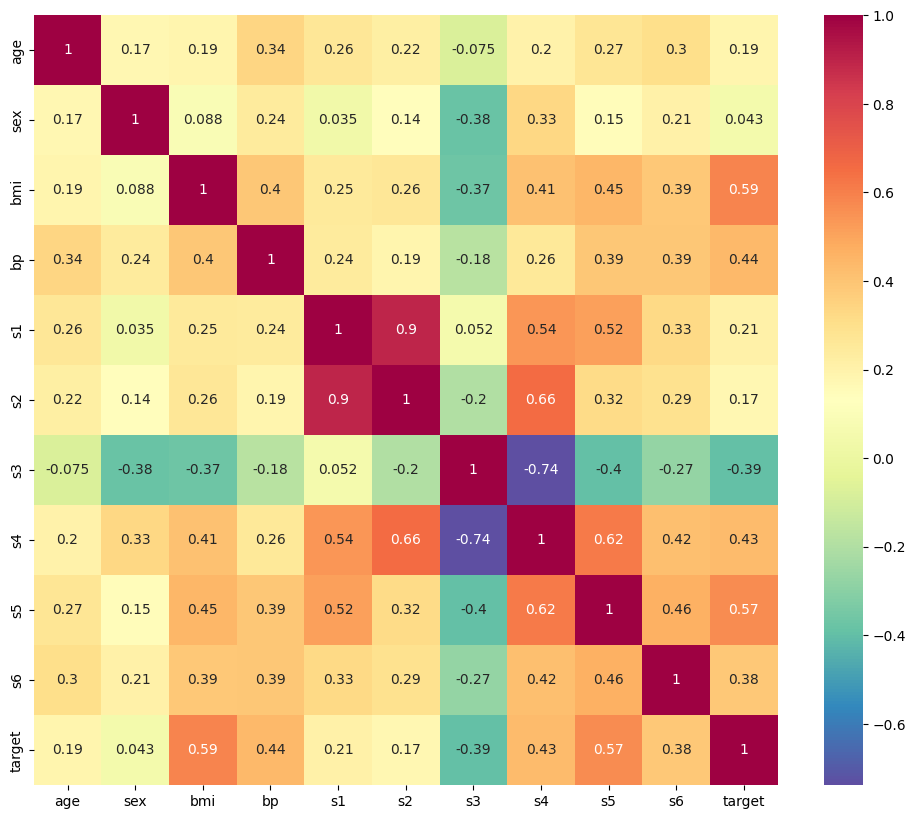

In [30]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot= True, cmap='Spectral_r')

In [35]:
X = data.data
y= data.target

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=45)


In [37]:
from sklearn.linear_model import LinearRegression
L= LinearRegression()

In [38]:
L.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = L.predict(X_test)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

print ('R2 score', r2_score(y_test,y_pred))
print ('RMSC',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSC 48.72713760953253


In [45]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.001)

In [47]:
R.fit(X_train,y_train)

Ridge(alpha=0.001)

In [49]:
y_pred1 = R.predict(X_test)

In [50]:
print('r2 score', r2_score(y_test,y_pred1))

r2 score 0.5201448351821762


In [52]:
print('RMSC',np.sqrt(mean_squared_error(y_test,y_pred1)))

RMSC 48.65957177859253


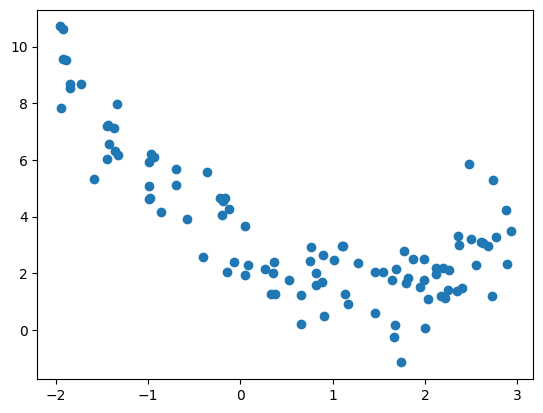

In [53]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

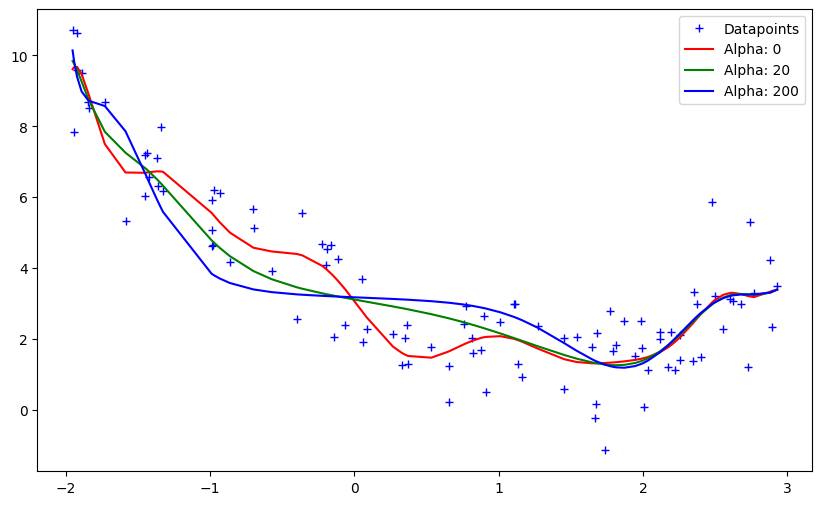

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()